In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
from prophet import Prophet

In [2]:
df = pd.read_csv('data_GE.csv')

df

,datum,cases_FR,diff_cases_FR,diff_2_cases_FR,cases_GE,diff_cases_GE,diff_2_cases_GE,cases_GR,diff_cases_GR,diff_2_cases_GR,...,test_TI,diff_test_TI,diff_2_test_TI,test_VD,diff_test_VD,diff_2_test_VD,test_VS,diff_test_VS,diff_2_test_VS,vac_all
0,2020-03-01,0.285714,0.000000,-0.285714,1.428571,0.142857,0.142857,1.285714,0.142857,-0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020-03-02,0.285714,0.000000,0.000000,1.714286,0.285714,0.142857,1.285714,0.000000,-0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2020-03-03,0.714286,0.428571,0.428571,1.714286,0.000000,-0.285714,1.428571,0.142857,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2020-03-04,1.000000,0.285714,-0.142857,1.714286,0.000000,0.000000,1.142857,-0.285714,-0.428571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2020-03-05,1.142857,0.142857,-0.142857,1.857143,0.142857,0.142857,1.285714,0.142857,0.428571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,2022-01-09,1352.000000,-4.571429,-70.428571,2443.428571,-1.142857,-119.857143,1013.285714,-13.714286,-48.571429,...,3794.285714,61.000000,-192.714286,8843.142857,111.857143,-507.428571,4036.571429,53.571429,-170.285714,162.535714
680,2022-01-10,1363.000000,11.000000,15.571429,2520.571429,77.142857,78.285714,975.285714,-38.000000,-24.285714,...,3848.000000,53.714286,-7.285714,9018.714286,175.571429,63.714286,4030.142857,-6.428571,-60.000000,163.337143
681,2022-01-11,1334.857143,-28.142857,-39.142857,2515.857143,-4.714286,-81.857143,927.857143,-47.428571,-9.428571,...,3851.714286,3.714286,-50.000000,9028.142857,9.428571,-166.142857,3984.571429,-45.571429,-39.142857,164.125714
682,2022-01-12,1288.857143,-46.000000,-17.857143,2475.142857,-40.714286,-36.000000,843.571429,-84.285714,-36.857143,...,3727.142857,-124.571429,-128.285714,8877.000000,-151.142857,-160.571429,3904.571429,-80.000000,-34.428571,164.895714


In [3]:
df_model = df[['datum', 'hosp_GE']]

df_model.rename(columns={'datum': 'ds', 'hosp_GE': 'y'}, inplace = True)

df_model = df_model.iloc[:-3]

df_model

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/swiss_lstm/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




,ds,y
0,2020-03-01,0.428571
1,2020-03-02,0.428571
2,2020-03-03,0.428571
3,2020-03-04,0.571429
4,2020-03-05,0.857143
...,...,...
676,2022-01-06,22.285714
677,2022-01-07,23.000000
678,2022-01-08,21.000000
679,2022-01-09,19.285714


In [4]:
m = Prophet(daily_seasonality = False, changepoint_prior_scale = 0.5, seasonality_prior_scale = 10,
           seasonality_mode = 'multiplicative',
           n_forecasts=14)

m.fit(df_model[:-14])

future = m.make_future_dataframe(periods = 14)

forecast = m.predict(future)

forecast

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-03-01,0.740666,-1.933046,3.297079,0.740666,0.740666,0.010056,0.010056,0.010056,0.010056,0.010056,0.010056,0.0,0.0,0.0,0.748114
1,2020-03-02,1.212766,-1.483448,3.689517,1.212766,1.212766,0.020980,0.020980,0.020980,0.020980,0.020980,0.020980,0.0,0.0,0.0,1.238209
2,2020-03-03,1.684866,-0.978683,4.283640,1.684866,1.684866,-0.019777,-0.019777,-0.019777,-0.019777,-0.019777,-0.019777,0.0,0.0,0.0,1.651545
3,2020-03-04,2.156966,-0.482462,4.651436,2.156966,2.156966,-0.013240,-0.013240,-0.013240,-0.013240,-0.013240,-0.013240,0.0,0.0,0.0,2.128408
4,2020-03-05,2.629065,0.128410,5.214944,2.629065,2.629065,-0.003837,-0.003837,-0.003837,-0.003837,-0.003837,-0.003837,0.0,0.0,0.0,2.618978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,2022-01-06,10.360128,7.746606,13.094952,10.247927,10.596755,-0.003837,-0.003837,-0.003837,-0.003837,-0.003837,-0.003837,0.0,0.0,0.0,10.320376
677,2022-01-07,10.421722,7.989496,13.076908,10.240989,10.774542,-0.000258,-0.000258,-0.000258,-0.000258,-0.000258,-0.000258,0.0,0.0,0.0,10.419031
678,2022-01-08,10.483316,7.965127,13.318711,10.224956,10.896707,0.006076,0.006076,0.006076,0.006076,0.006076,0.006076,0.0,0.0,0.0,10.547015
679,2022-01-09,10.544910,7.926352,13.287643,10.212017,11.036279,0.010056,0.010056,0.010056,0.010056,0.010056,0.010056,0.0,0.0,0.0,10.650947


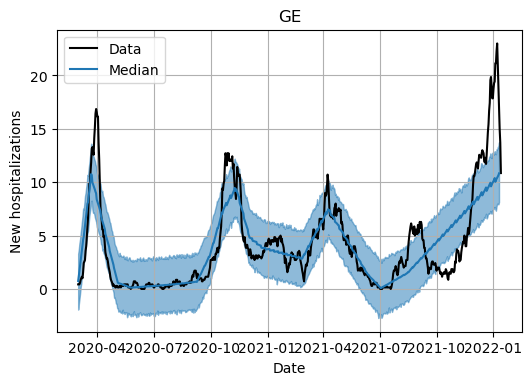

In [5]:
fig, ax = plt.subplots(dpi = 100)

ax.plot(pd.to_datetime(df['datum']), df['hosp_GE'], label = 'Data', color = 'black')

ax.plot(pd.to_datetime(forecast.ds), forecast.yhat, label = 'Median', color = 'tab:blue')

ax.fill_between(pd.to_datetime(forecast.ds), forecast.yhat_lower, forecast.yhat_upper, color = 'tab:blue', alpha = 0.5)

ax.set_title('GE')
ax.set_xlabel('Date')
ax.set_ylabel('New hospitalizations')
ax.grid()
ax.legend()
plt.show()

In [43]:
m = NeuralProphet(  growth='off',
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=3*14,
    n_forecasts=14,
    ar_sparsity=0.95,
    learning_rate = 0.01)

model = m.fit(df_model[:-14], freq="D", epochs = 1000)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 16
Epoch[1000/1000]: 100%|██████████| 1000/1000 [00:21<00:00, 46.04it/s, SmoothL1Loss=0.00633, MAE=0.92, RMSE=1.32, RegLoss=0.000823]


In [44]:
future = m.make_future_dataframe(df_model[:-14], periods = 14)

forecast = m.predict(future)

forecast

,ds,y,yhat1,residual1,yhat2,residual2,yhat3,residual3,yhat4,residual4,...,ar6,ar7,ar8,ar9,ar10,ar11,ar12,ar13,ar14,trend
0,2021-11-16,4.714286,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
1,2021-11-17,4.000000,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
2,2021-11-18,4.000000,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
3,2021-11-19,4.857143,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
4,2021-11-20,5.142857,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
5,2021-11-21,5.714286,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
6,2021-11-22,5.142857,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
7,2021-11-23,5.428571,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
8,2021-11-24,6.142857,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
9,2021-11-25,6.857143,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None


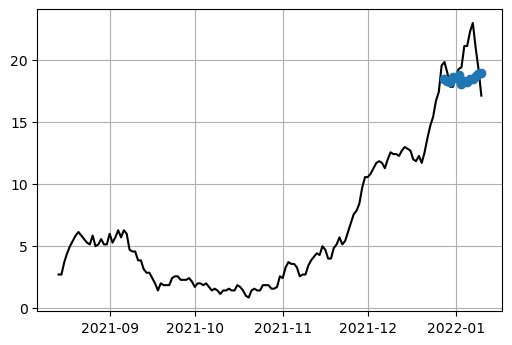

In [46]:
fig ,ax = plt.subplots(dpi = 100)

ax.plot(df_model.ds[-150:], df_model.y[-150:], label = 'Data', color = 'black')

for i in np.arange(1, 15):
    ax.plot(forecast.ds, forecast[f'yhat{i}'], 'o', color = 'tab:blue')
#m.plot(forecast, ax = ax)

ax.grid()
plt.show()

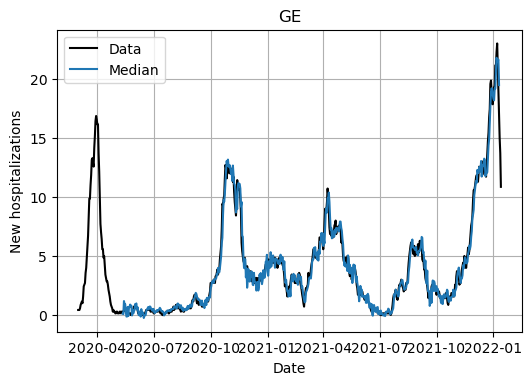

In [32]:
fig, ax = plt.subplots(dpi = 100)

ax.plot(pd.to_datetime(df['datum']), df['hosp_GE'], label = 'Data', color = 'black')

ax.plot(pd.to_datetime(forecast.ds), forecast.yhat1, label = 'Median', color = 'tab:blue')

#ax.fill_between(pd.to_datetime(forecast.ds), forecast.yhat_lower, forecast.yhat_upper, color = 'tab:blue', alpha = 0.5)

ax.set_title('GE')
ax.set_xlabel('Date')
ax.set_ylabel('New hospitalizations')
ax.grid()
ax.legend()
plt.show()